<a href="https://www.kaggle.com/code/william2020/semantic-sim-detection-model-confusion-reduction?scriptVersionId=185988099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Semantic Intent Similiarity Detection and Model Confusion Reduction

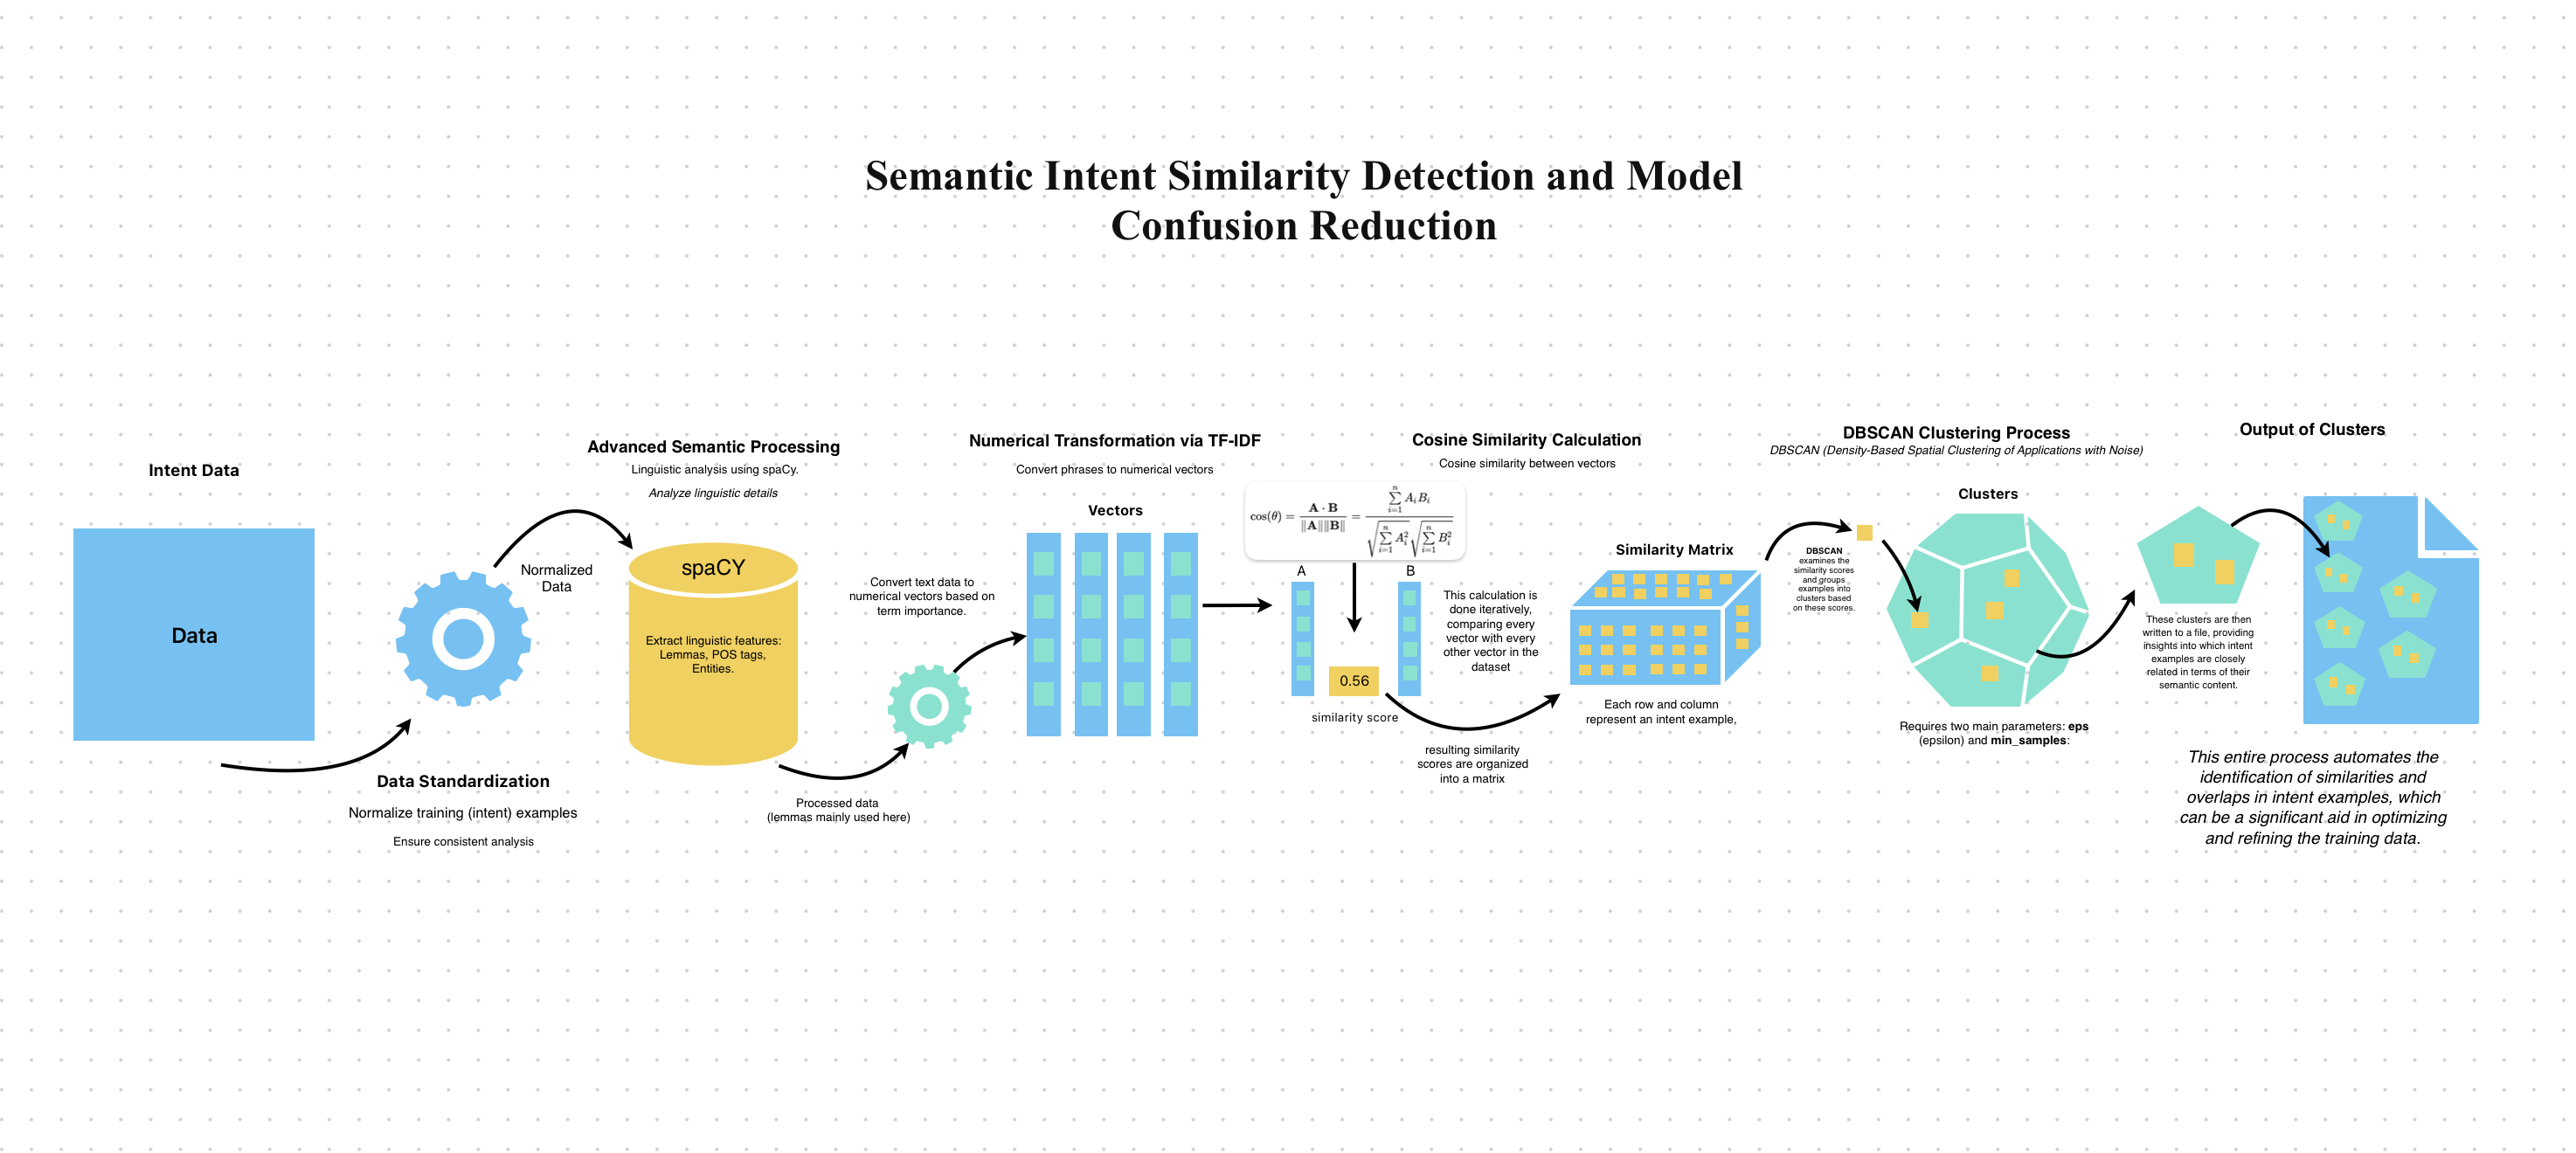

I created the above diagram to show this process e2e

This notebook contains the process and code for clustering intent examples based on their semantic similarity. The aim is to group similar intent examples together to reduce model confusion and improve intent detection accuracy.

## Process Overview

The following steps illustrate the overall process of semantic intent similarity detection and model confusion reduction:

1. **Data Standardization**:
    - Normalize training examples to ensure consistent analysis.
    
2. **Advanced Semantic Processing**:
    - Extract linguistic features using `spaCy` such as lemmas, parts of speech (POS), and named entities.
    
3. **Numerical Transformation via TF-IDF**:
    - Convert text data into numerical vectors based on term importance.
    
4. **Cosine Similarity Calculation**:
    - Calculate the cosine similarity between vectors to generate a similarity matrix.
    
5. **DBSCAN Clustering Process**:
    - Cluster intent examples using DBSCAN (Density-Based Spatial Clustering of Applications with Noise).
    
6. **Output of Clusters**:
    - Group similar intent examples together, providing insights into which examples are closely related in terms of their semantic content.

In [ ]:
!pip install -q spacy scikit-learn pandas seaborn matplotlib
!python -m spacy download en_core_web_sm

In [13]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
import numpy as np

In [14]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

In [15]:
# Example intent data
intents = [
    "How do I reset my password?",
    "What is the process to change my password?",
    "Can you help me with password recovery?",
    "What is the refund policy?",
    "How can I get a refund?",
    "Tell me about your return policy.",
]

In [16]:
# Data Standardization and Advanced Semantic Processing
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(lemmas)

normalized_data = [preprocess(intent) for intent in intents]

In [17]:
# Numerical Transformation via TF-IDF
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(normalized_data)

In [18]:
# Cosine Similarity Calculation
similarity_matrix = cosine_similarity(vectors)

In [19]:
# DBSCAN Clustering Process
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
clusters = dbscan.fit_predict(similarity_matrix)

In [20]:
# Output Clusters
clustered_intents = {}
for cluster_id in np.unique(clusters):
    clustered_intents[cluster_id] = [intents[i] for i in range(len(clusters)) if clusters[i] == cluster_id]

In [21]:
# Print the output clusters
for cluster_id, cluster_intents in clustered_intents.items():
    print(f"Cluster {cluster_id}:")
    for intent in cluster_intents:
        print(f"  - {intent}")

Cluster -1:
  - How do I reset my password?
  - What is the process to change my password?
  - Can you help me with password recovery?
Cluster 0:
  - What is the refund policy?
  - How can I get a refund?
  - Tell me about your return policy.
